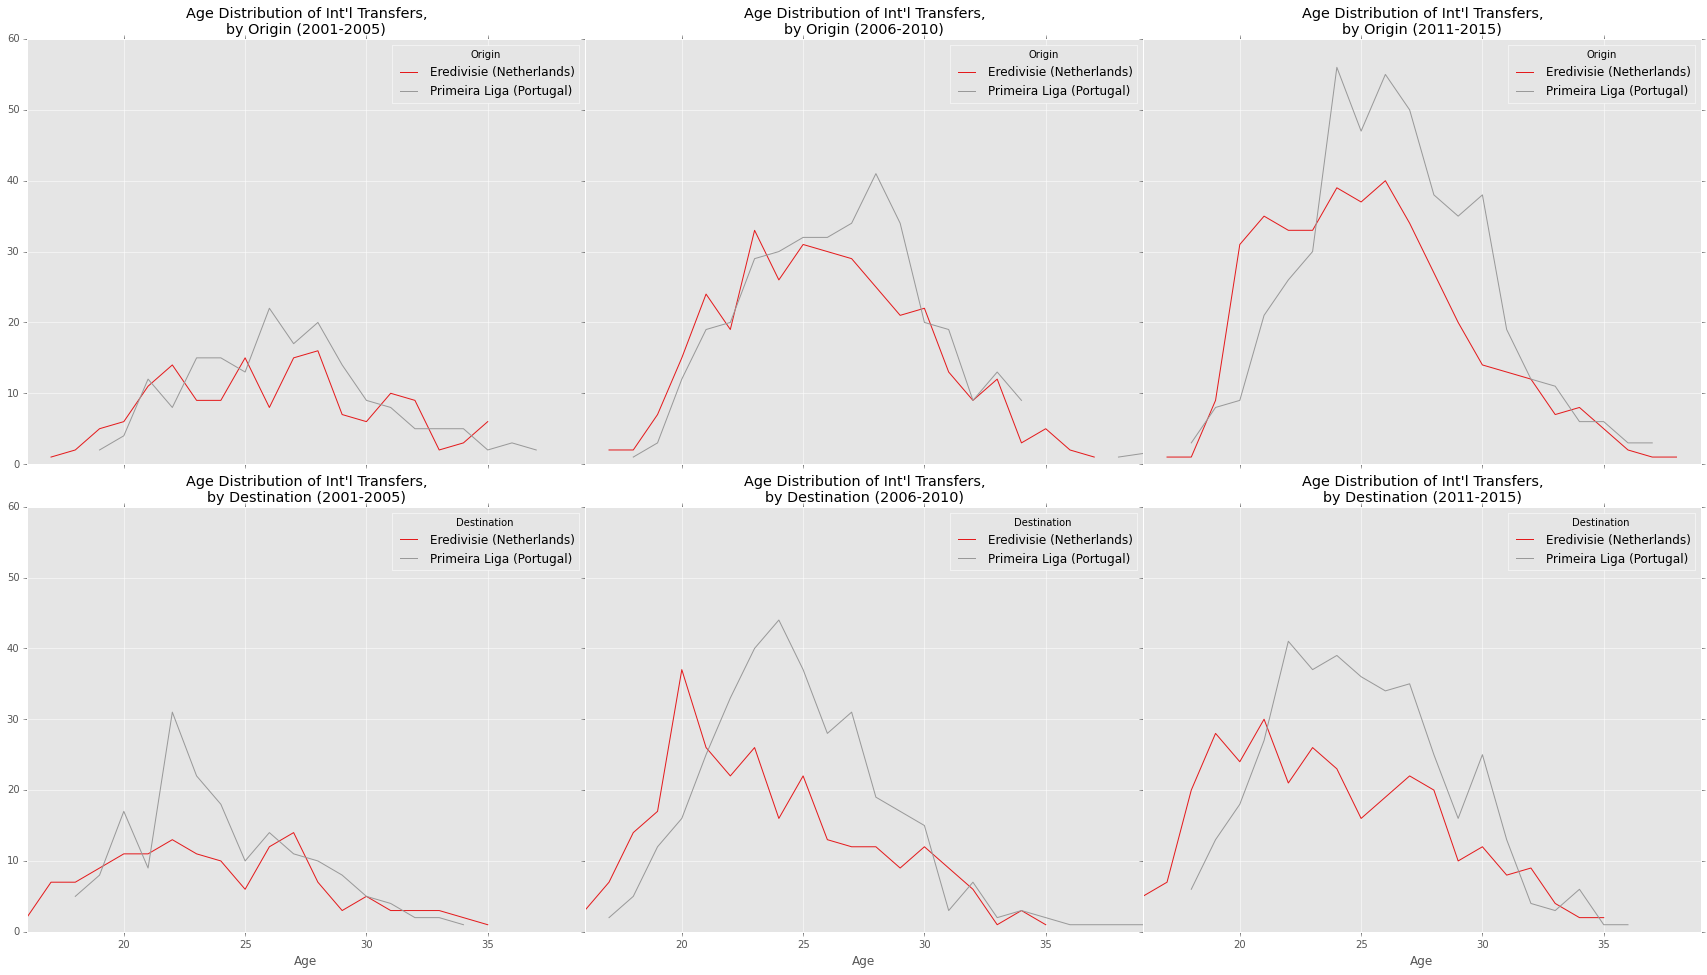

In [251]:
leagues=['NL1','PO1']

df1=nonloans[(nonloans['toCountry']!=nonloans['fromCountry'])&(nonloans['fromLeague'].isin(leagues))] \
    .rename(columns={'fromLeague':'Origin'}).groupby(['Age','Origin','period'])['id'].count().unstack().unstack() \
    .rolling(window=1,center=False).mean().rename(columns=leagueCodeMapping)
    
df2=nonloans[(nonloans['toCountry']!=nonloans['fromCountry'])&(nonloans['toLeague'].isin(leagues))] \
    .rename(columns={'toLeague':'Destination'}).groupby(['Age','Destination','period'])['id'].count().unstack().unstack() \
    .rolling(window=1,center=False).mean().rename(columns=leagueCodeMapping)


fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(30, 16),sharex=True,sharey=True)

#df['(1995, 2000]'].plot(ax=axes[0,0], title="Age Distribution of Int'l Transfers, \nby Origin (1996-2000)", colormap='Set1', legend=False)
df1['(2000, 2005]'].plot(ax=axes[0,0], title="Age Distribution of Int'l Transfers, \nby Origin (2001-2005)", colormap='Set1', legend=True)
df1['(2005, 2010]'].plot(ax=axes[0,1], title="Age Distribution of Int'l Transfers, \nby Origin (2006-2010)", colormap='Set1', legend=True)
df1['(2010, 2015]'].plot(ax=axes[0,2], title="Age Distribution of Int'l Transfers, \nby Origin (2011-2015)", colormap='Set1', legend=True)
df2['(2000, 2005]'].plot(ax=axes[1,0], title="Age Distribution of Int'l Transfers, \nby Destination (2001-2005)", colormap='Set1', legend=True)
df2['(2005, 2010]'].plot(ax=axes[1,1], title="Age Distribution of Int'l Transfers, \nby Destination (2006-2010)", colormap='Set1', legend=True)
df2['(2010, 2015]'].plot(ax=axes[1,2], title="Age Distribution of Int'l Transfers, \nby Destination (2011-2015)", colormap='Set1', legend=True)

plt.subplots_adjust(wspace=0,hspace=.1)

fig.savefig('age_by_league.png')


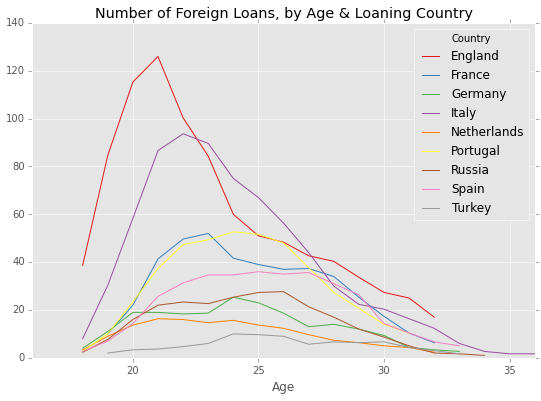

In [128]:
loans[(loans['fromCountry']!=loans['toCountry'])&(loans['fromCountry'].isin(['England','Spain','Germany','Italy','France','Netherlands','Portugal','Russia','Turkey']))] \
    .rename(columns={'fromCountry':'Country'}).groupby(['Age','Country'])['id'].count().unstack() \
    .rolling(window=3,center=False).mean().plot.line(figsize=(9,6),title='Number of Foreign Loans, by Age & Loaning Country',colormap='Set1')

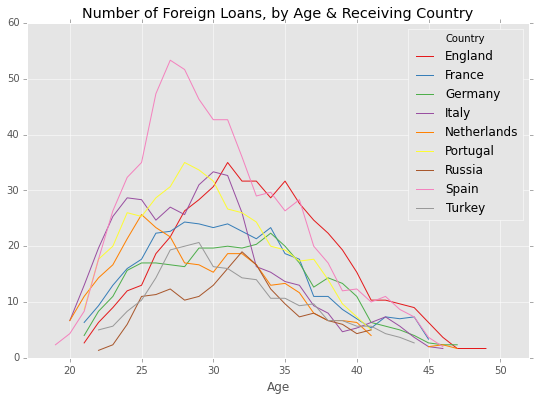

In [12]:
loans[(loans['fromCountry']!=loans['toCountry'])&(loans['toCountry'].isin(['England','Spain','Germany','Italy','France','Netherlands','Portugal','Russia','Turkey']))] \
    .rename(columns={'toCountry':'Country'}).groupby(['Age','Country'])['id'].count().unstack() \
    .rolling(window=3,center=False).mean().plot.line(figsize=(9,6),title='Number of Foreign Loans, by Age & Receiving Country',colormap='Set1')

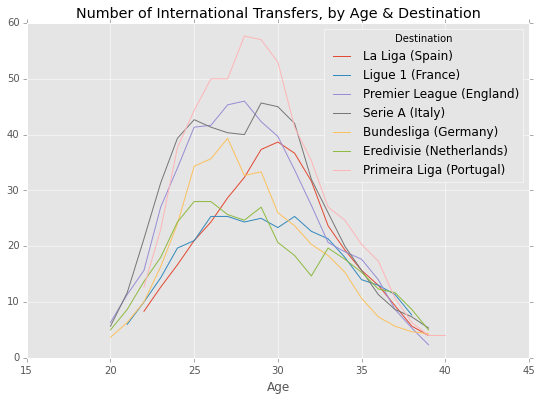

In [11]:
nonloans[(nonloans['toCountry']!=nonloans['fromCountry'])&(nonloans['toLeague'].isin(['GB1','ES1','L1','IT1','FR1','NL1','PO1']))&(nonloans['season']>=2010)] \
    .rename(columns={'toLeague':'Destination'}).groupby(['Age','Destination'])['id'].count().unstack() \
    .rolling(window=3,center=False).mean().rename(columns=leagueCodeMapping).plot.line(figsize=(9,6),xlim=(15,45),title='Number of International Transfers, by Age & Destination')

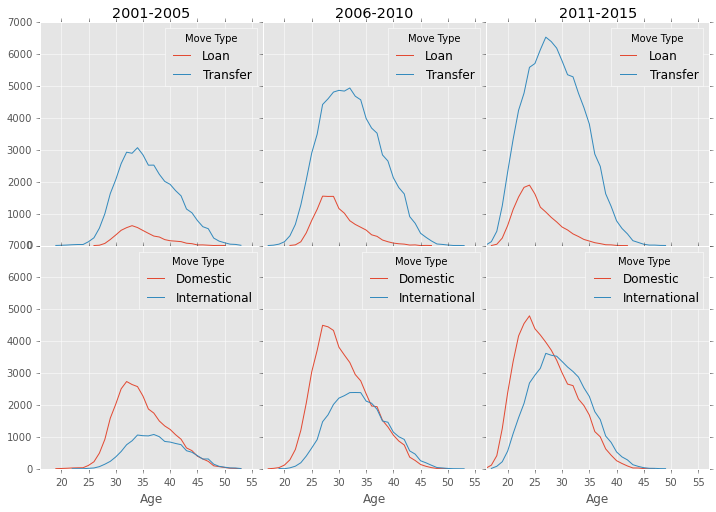

In [9]:
t=transfers

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8),sharex=True,sharey=True)

isLoan=t.join(pd.Series(np.where(t['isLoan'],'Loan','Transfer')).rename('Move Type')).groupby(['Age','Move Type','period'])['id'].count().unstack().unstack()


foreignVdomestic =t.join(pd.Series(np.where(t['fromCountry']==t['toCountry'],'Domestic','International')).rename('Move Type'))\
    .groupby(['Age','Move Type','period'])['id'].count().unstack().unstack()
    
isLoan['(2000, 2005]'].plot(ax=axes[0,0],title='2001-2005')
isLoan['(2005, 2010]'].plot(ax=axes[0,1],title='2006-2010')
isLoan['(2010, 2015]'].plot(ax=axes[0,2],title='2011-2015')

foreignVdomestic['(2000, 2005]'].plot(ax=axes[1,0])
foreignVdomestic['(2005, 2010]'].plot(ax=axes[1,1])
foreignVdomestic['(2010, 2015]'].plot(ax=axes[1,2])


plt.subplots_adjust(wspace=0,hspace=0)

fig.savefig('loan_intl.png')

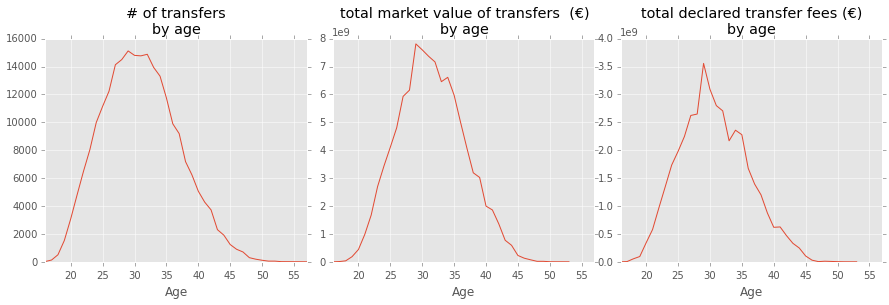

In [6]:
t=transfers[transfers['season'].between(2001,2015)]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4),sharex=True,sharey=False)


t.groupby('Age')['id'].count().plot(ax=axes[0],title=u'# of transfers\nby age')
t.groupby('Age')['feeValue'].sum().plot(ax=axes[2], title=u'total declared transfer fees (€)\nby age')
t.groupby('Age')['mv'].sum().plot(ax=axes[1],title=u'total market value of transfers  (€)\nby age')


plt.subplots_adjust(wspace=.1,hspace=0)

fig.savefig('age_curves.png')

In [5]:
t[t['feeValue']>0].groupby('Age')

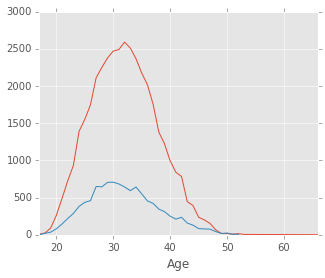

In [4]:
t=transfers[transfers['fromCountry']!=transfers['toCountry']]

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5, 4),sharex=True,sharey=False)


t[t['feeValue']==0].groupby('Age')['id'].count().plot(ax=axes)
t[t['feeValue']>0].groupby('Age')['id'].count().plot(ax=axes)


plt.subplots_adjust(wspace=.1,hspace=0)

fig.savefig('age_curves_paid_free.png')

In [28]:
t[t['feeValue']==0]['Age'].describe()

count    23000.000000
mean        25.424826
std          4.523622
min          7.000000
25%         22.000000
50%         25.000000
75%         29.000000
max         41.000000
Name: Age, dtype: float64

In [27]:
t[t['feeValue']>0]['Age'].describe()

count    8578.000000
mean       23.803684
std         3.558263
min        12.000000
25%        21.000000
50%        24.000000
75%        26.000000
max        38.000000
Name: Age, dtype: float64

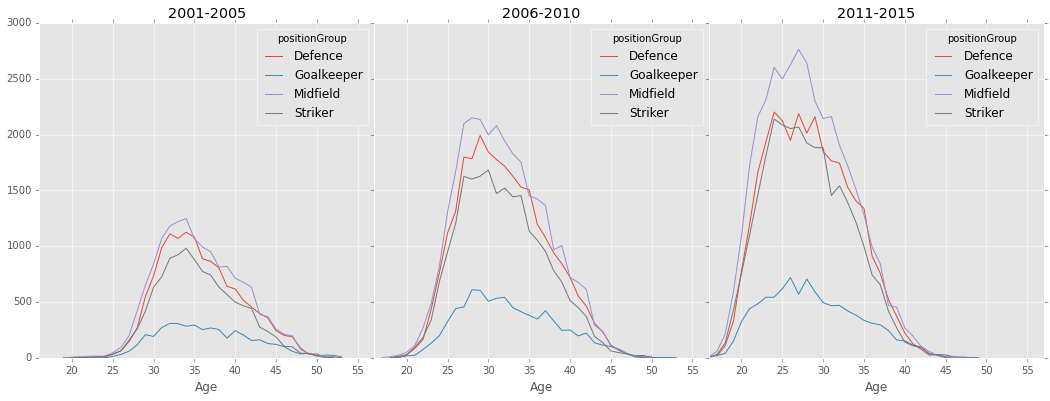

In [3]:
t=transfers

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6),sharex=True,sharey=True)

g=t.groupby(['Age','positionGroup','period'])['id'].count().unstack().unstack() #.plot(ax=axes)

g['(2000, 2005]'].plot(ax=axes[0],title='2001-2005')
g['(2005, 2010]'].plot(ax=axes[1],title='2006-2010')
g['(2010, 2015]'].plot(ax=axes[2],title='2011-2015')


plt.subplots_adjust(wspace=0,hspace=0)

fig.savefig('loan_intl.png')

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
from urllib2 import urlopen, Request
from bs4 import BeautifulSoup
from pandas import DataFrame
import pandas as pd
import numpy as np
import re
import os.path 
import datetime 
import math
import matplotlib.pyplot as plt

transfers = pd.read_csv('../data/merged/transfers.csv')
loans = pd.read_csv('../data/merged/loans.csv')
nonloans = pd.read_csv('../data/merged/nonloans.csv')
players=pd.read_csv('../data/merged/players.csv')

leagueCodeMapping = {'GB1':'Premier League (England)','FR1':'Ligue 1 (France)',
                                                         'ES1':'La Liga (Spain)','IT1':'Serie A (Italy)','L1':'Bundesliga (Germany)',
                                                         'PO1':'Primeira Liga (Portugal)','NL1':'Eredivisie (Netherlands)'}

teamIdMap = pd.concat([transfers[['toTeamId','toTeamName','season']].rename(columns={'toTeamId':'teamId','toTeamName':'teamName'}),
    transfers[['fromTeamId','fromTeamName','season']].rename(columns={'fromTeamId':'teamId','fromTeamName':'teamName'})],ignore_index=True) \
    .sort_values('season',ascending=False).drop_duplicates('teamId').set_index('teamId')['teamName'].to_dict()
    
agentIdMap = transfers[['playersAgentId','playersAgent']].sort_values('playersAgent',ascending=False).drop_duplicates('playersAgentId').set_index('playersAgentId')['playersAgent'].to_dict()

/Users/sunkevin/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2871: DtypeWarning: Columns (40,45,47,49,50,51) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/sunkevin/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2871: DtypeWarning: Columns (45,47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/sunkevin/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2871: DtypeWarning: Columns (45,47,49,50,51) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/sunkevin/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2871: DtypeWarning: Columns (32,34) have mixed types. Specify dtype option on import or set low_memory=False.
